<a href="https://colab.research.google.com/github/ptran1203/photorealistic_style_transfer/blob/master/WCT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive, output
import os
import json

%cd /content/
!rm -rf '/content/photorealistic_style_transfer'
!git clone https://github.com/ptran1203/photorealistic_style_transfer
%cd photorealistic_style_transfer

if not os.path.exists("/content/tfrecords"):
    !wget -O /content/tfrecords.zip https://github.com/ptran1203/photorealistic_style_transfer/releases/download/v1.0/tfrecords.zip
    !unzip /content/tfrecords.zip -d /content/
output.clear()

In [ ]:
!python3 train.py --train-tfrec /content/tfrecords/train.tfrec\
                --val-tfrec /content/tfrecords/val.tfrec\
                --epochs 100\
                --resume\
                --batch-size 8\
                --lr 2e-4\

In [3]:
# !python3 inference.py --content /content/photorealistic_style_transfer/examples/input/in21.png\
#                     --style /content/photorealistic_style_transfer/examples/style\
#                     --output /content/tests

In [25]:
from model import WCT2
from utils import read_img, download_weight, display_outputs
import cv2

model = WCT2()
model.load_weight('/content/checkpoints/wtc2.h5')

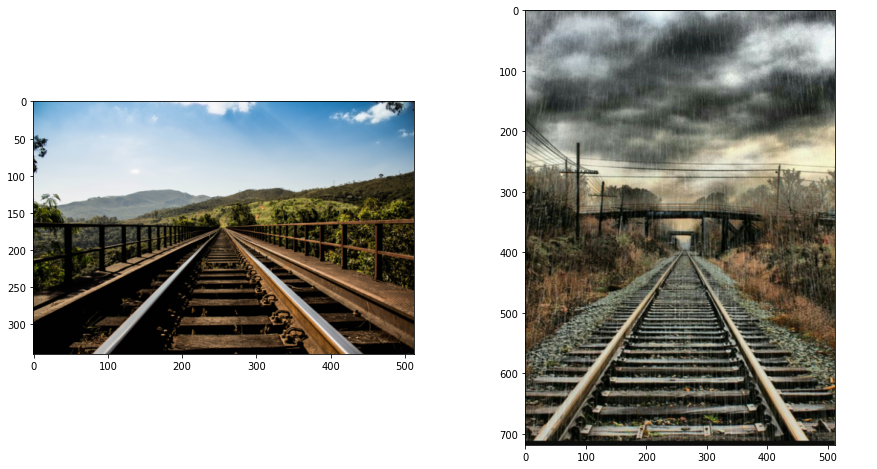

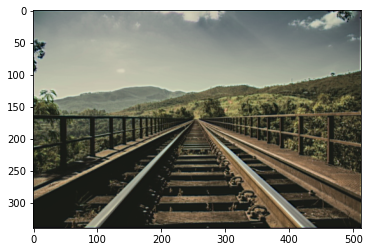

In [31]:
idx = 53
content = f'/content/photorealistic_style_transfer/examples/input/in{idx}.png'
style = f'/content/photorealistic_style_transfer/examples/style/tar{idx}.png'

image_size = 512
content = read_img(content, image_size, expand_dims=True)
style = read_img(style, image_size, expand_dims=True)

gen = model.transfer(content, style, 1.0)
cv2.imwrite('/content/test.png', gen[0][...,::-1])
display_outputs(content[0], style[0], gen[0])

In [ ]:
gen[0]